In [2]:
import pandas as pd
import requests
import json
import os

In [123]:
url = 'https://www.olx.co.id/api/relevance/v2/search'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)...'
}

payload = {
    'category': 88,
    'facet_limit': 100,
    'location': 4000018,  # Jabar = 2000009, Bandung = 4000018
    'location_facet_limit': 20,
    'page': 0,
    'make': 'rumah',
    'platform': 'web-desktop',
    'size': 1000,
    'user': '1853803f4e7x4b21bd2d',
    'display_date': '2022-09-01'
}

data_json = []  # Initialize an empty list to store data

for location in range(4000001, 4000027):
    payload['location'] = location
    r = requests.get(url, params=payload, headers=headers)
    if r.status_code == 200:  # Check if the request was successful
        data_json.extend(r.json().get('data', []))
    else:
        print(f"Failed to fetch data for location {location}: {r.status_code}")

data_list = []  # Initialize an empty list to store processed data

In [7]:
# url='https://www.olx.co.id/api/relevance/v2/search'
# headers={
#     'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64)...'

#     for location in range(4000001, 4000027):
#         payload['location'] = location
#         r = requests.get(url, params=payload, headers=headers)
#         data_json.extend(r.json().get('data', []))

# }
# payload= {
#     'category': 88,
#     'facet_limit': 100,
#     'location': 4000018, # Jabar = 2000009, Bandung = 4000018
#     'location_facet_limit': 20,
#     'page': 0,
#     'make': 'rumah',
#     'platform': 'web-desktop',
#     'size': 1000,
#     'user':'1853803f4e7x4b21bd2d',
#     'display_date':'2022-09-01'
# }

# r=requests.get(url,params=payload,headers=headers)
# data_json=r.json()['data']
# data_list=[]

In [124]:
for data in data_json:
    data_dict = {
        'provinsi': data['locations_resolved'].get('ADMIN_LEVEL_1_name', 'Tidak tersedia'),
        'kabkota': data['locations_resolved'].get('ADMIN_LEVEL_3_name', 'Tidak tersedia'),
        'kec': data['locations_resolved'].get('SUBLOCALITY_LEVEL_1_name', 'Tidak tersedia'),
        'display_date': data.get('display_date', 'Tidak tersedia'),
        'title': data.get('title', 'Tidak tersedia'),
        'harga': data.get('price', {}).get('value', {}).get('raw', 'Tidak tersedia'),
        'penjual': data.get('user_name', 'Tidak tersedia'),
        'lat': data.get('locations', [{}])[0].get('lat', 'Tidak tersedia'),
        'lng': data.get('locations', [{}])[0].get('lon', 'Tidak tersedia'),
        'tgl_publikasi': data.get('created_at', 'Tidak tersedia'),
        'deskripsi': data.get('description', 'Tidak tersedia')
    }
    
    data_list.append(data_dict)


In [125]:
df = pd.DataFrame(data_list)
df.to_csv('data/data_rumah_1000.csv', index=False)

# Buka Data Rumah

In [2]:
import pandas as pd

In [3]:
data_rumah = pd.read_csv('data/data_rumah_1000.csv')
data_rumah['harga_juta'] = data_rumah['harga'] / 1e6
data_rumah.head()

,provinsi,kabkota,kec,display_date,title,harga,penjual,lat,lng,tgl_publikasi,deskripsi,harga_juta
0,Jawa Barat,Bandung Kab.,Katapang,2025-03-20T08:09:59+0000,Dijual Gudang Strategis Siap Huni Di Katapang,3.750000e+09,Irene Xaveria,-7.007,107.556,2025-03-21T11:47:05+07:00,Dijual / dikontrakkan\nGudang KATAPANGLT 1237 ...,3750.0
1,Jawa Barat,Bandung Kab.,Tidak tersedia,2025-03-07T15:54:08+0000,TURUN HARGA Dijual Rumah Villa Resort Dago Pa...,4.300000e+09,Raden Artha Property,-6.999,107.556,2025-03-10T12:37:00+07:00,TURUN HARGA\n\n\nDijual Rumah Villa Resort Dag...,4300.0
2,Jawa Barat,Bandung Kab.,Katapang,2025-03-05T17:29:50+0000,DIJUAL SAWAH PRODUKTIF – DEKAT PEMUKIMAN KATAPANG,6.175000e+08,Juni Harta,-7.007,107.556,2025-03-20T08:06:24+07:00,- Sawah produktif tidak pernah berhenti menana...,617.5
3,Jawa Barat,Bandung Kab.,Margahayu,2025-03-13T21:21:03+0000,"Rumah di lokasi strategis ,nyaman dan aman di ...",1.100000e+09,Yuni Dani Yanti,-6.975,107.580,2025-03-17T15:50:25+07:00,"Lt 141 ,Luas bangunan full sampai kebelakang, ...",1100.0
4,Jawa Barat,Bandung Kab.,Katapang,2025-03-23T13:29:33+0000,Dijual Rumah Hitung Tanah Murah di Katapang So...,9.500000e+08,Harits Alpha Realty,-7.007,107.556,2025-03-23T20:29:33+07:00,"Sertifikat SHM, LT 317, LB 70, LM 4, Hadap Bar...",950.0


In [10]:
data_rumah = data_rumah.drop_duplicates(subset='deskripsi', keep='first')
data_rumah = data_rumah[(data_rumah['harga'] >= 100000000) & (data_rumah['harga'] < 10000000000)]
data_rumah = data_rumah[data_rumah['title'].str.contains('rumah', case=False, na=False)]
data_rumah = data_rumah[~data_rumah['kabkota'].isin(['Jakarta Selatan', 'Brebes Kab.', 'Tegal Kab.'])]
data_rumah.describe(include='all')

,provinsi,kabkota,kec,display_date,title,harga,penjual,lat,lng,tgl_publikasi,deskripsi,harga_juta,price_range
count,4461,4461,4461,4461,4461,4.461000e+03,4461,4461.000000,4461.000000,4461,4461,4461.000000,4461
unique,2,28,289,4390,4381,NaN,1631,NaN,NaN,4376,4461,NaN,5
top,Jawa Barat,Bogor Kab.,Tidak tersedia,2025-03-23T13:27:02+0000,dijual rumah perumahan citra indah city,NaN,Jamaludin Soleh,NaN,NaN,2025-03-21T14:53:14+07:00,TURUN HARGA\n\n\nDijual Rumah Villa Resort Dag...,NaN,1000-4999
freq,4456,429,534,3,17,NaN,70,NaN,NaN,3,1,NaN,1783
mean,NaN,NaN,NaN,NaN,NaN,1.404156e+09,NaN,-6.747351,107.534987,NaN,NaN,1404.156063,NaN
std,NaN,NaN,NaN,NaN,NaN,1.510542e+09,NaN,0.315698,0.592585,NaN,NaN,1510.541728,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+08,NaN,-7.711000,106.664000,NaN,NaN,100.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.932000e+08,NaN,-6.939000,107.000000,NaN,NaN,493.200000,NaN
50%,NaN,NaN,NaN,NaN,NaN,8.750000e+08,NaN,-6.826000,107.532000,NaN,NaN,875.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.700000e+09,NaN,-6.476000,107.876000,NaN,NaN,1700.000000,NaN


In [11]:
# Define new bins for tabulation
bins = [0, 500, 1000, 5000, 6000, float('inf')]
labels = ['100-499', '500-999', '1000-4999', '5000-6000', '>6000']

# Create a new column for the new price ranges
data_rumah['price_range'] = pd.cut(data_rumah['harga_juta'], bins=bins, labels=labels, right=False)

# Tabulate the counts for each new price range
price_tabulation = data_rumah['price_range'].value_counts().sort_index()

# Display the tabulation
print(price_tabulation)

price_range
100-499      1150
500-999      1337
1000-4999    1783
5000-6000      61
>6000         130
Name: count, dtype: int64


C:\Users\hisbi\AppData\Local\Temp\ipykernel_12272\3578052056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_rumah.groupby(['kabkota', 'price_range']).size().unstack(fill_value=0)


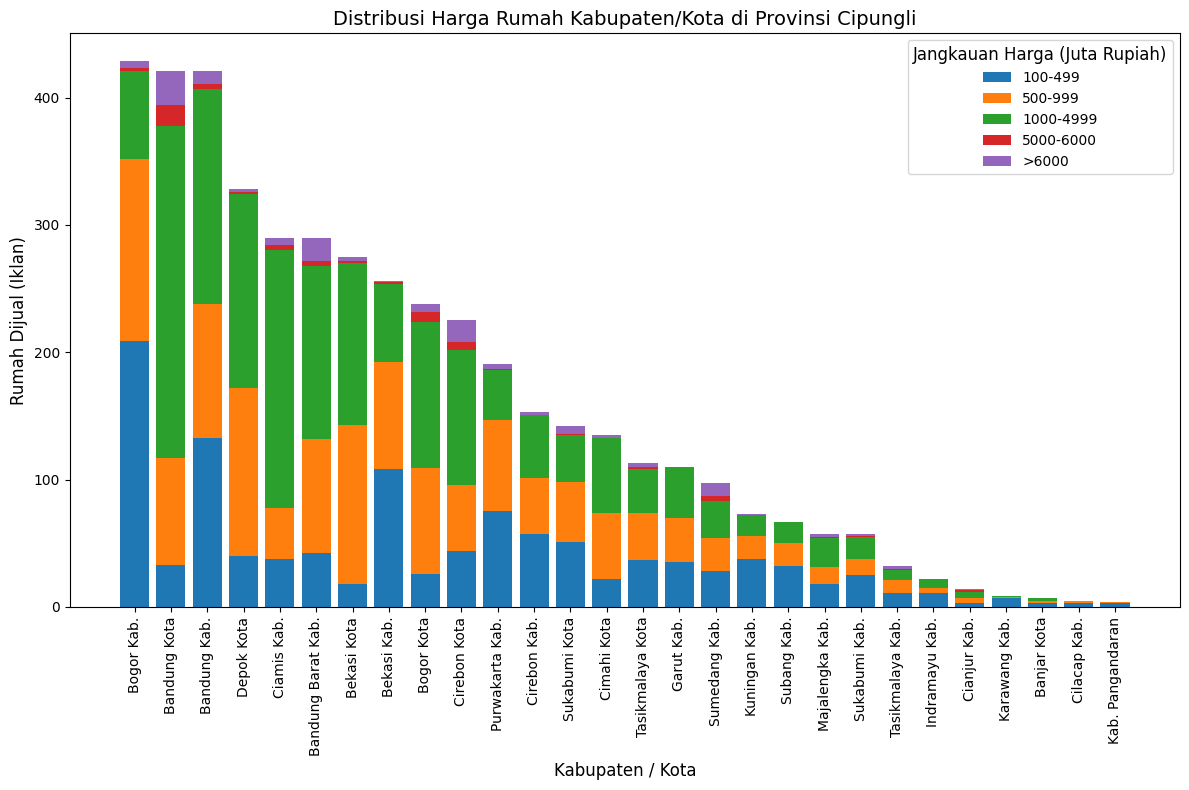

In [12]:


import matplotlib.pyplot as plt
import numpy as np

# Group the data by kabkota and price_range and calculate the counts
grouped_data = data_rumah.groupby(['kabkota', 'price_range']).size().unstack(fill_value=0)

# Calculate the total counts for each kabkota
total_counts = grouped_data.sum(axis=1)

# Sort kabkota by total counts in descending order
sorted_kabkota = total_counts.sort_values(ascending=False).index

# Reorder the grouped data based on the sorted kabkota
grouped_data_sorted = grouped_data.loc[sorted_kabkota]

# Pivot the sorted grouped data for the stacked bar chart
stacked_data_sorted = grouped_data_sorted.reset_index().melt(id_vars='kabkota', var_name='price_range', value_name='count')

# Create the stacked bar chart with sorted kabkota
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(stacked_data_sorted['kabkota'].unique()))  # Initialize the bottom values

for price_range in labels:
    subset = stacked_data_sorted[stacked_data_sorted['price_range'] == price_range]
    kabkota_order = stacked_data_sorted['kabkota'].unique()  # Ensure consistent order of kabkota
    subset = subset.set_index('kabkota').reindex(kabkota_order).fillna(0)  # Align with kabkota order
    ax.bar(subset.index, subset['count'], label=price_range, bottom=bottom)
    bottom += subset['count'].values  # Update the bottom values

# Customize the chart
ax.set_title('Distribusi Harga Rumah Kabupaten/Kota di Provinsi Cipungli', fontsize=14)
ax.set_xlabel('Kabupaten / Kota', fontsize=12)
ax.set_ylabel('Rumah Dijual (Iklan)', fontsize=12)
ax.legend(title='Jangkauan Harga (Juta Rupiah)', title_fontsize='12', fontsize='10', loc='upper right')
ax.tick_params(axis='x', rotation=90)

# Show the chart
plt.tight_layout()
plt.show()